In [4]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise  import cosine_similarity
import itertools

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sy_data = pd.read_csv('/content/Spotify_Youtube.csv') # Data file path read

In [6]:
sy_data.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [7]:
sy_data.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [8]:
sy_data.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

In [9]:
sy_data.head() # Printing first 10 values

,index,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [10]:
sy_data.shape

(20718, 28)

In [11]:
selected_feature = ['Artist','Track','Album','Title','Danceability','Energy']
print(selected_feature)

['Artist', 'Track', 'Album', 'Title', 'Danceability', 'Energy']


In [12]:
for feature in selected_feature:
  sy_data[feature] = sy_data[feature].fillna('')

In [13]:
combined_feature = sy_data['Artist']+' '+sy_data['Track']+' '+sy_data['Album']+' '+sy_data['Title']

In [14]:
#print(combined_feature)

In [15]:
from numpy.lib.function_base import vectorize
vectorizer = TfidfVectorizer()

In [16]:
feature_vectors = vectorizer.fit_transform(combined_feature)

In [18]:
#print(feature_vectors)

In [19]:
# similarity score using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [20]:
print(similarity.shape)


(20718, 20718)


In [23]:
song_name = input("Enter the song name: ")

Enter the song name: The night we met


In [25]:
list_song = sy_data['Track'].tolist()
#print(list_song)

In [26]:
from pandas.core.algorithms import diff
find_match = difflib.get_close_matches(song_name, list_song)
print(find_match)

['The Night We Met', 'The Fighter', 'The Light Is On']


In [27]:
find_closematch = find_match[0]
print(find_closematch)

The Night We Met


In [28]:
index_music = sy_data[sy_data.Track == find_closematch]['index'].values[0]
print(index_music)

14838


In [30]:

similarity_score = list(enumerate(similarity[index_music]))
#print(similarity_score)

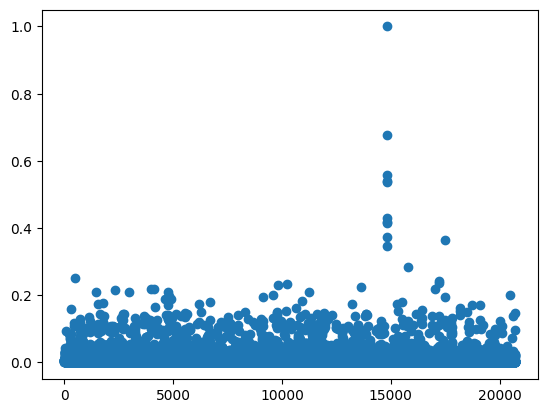

In [31]:
x = [d[0] for d in similarity_score]
y = [d[1] for d in similarity_score]

# Create scatter plot
plt.scatter(x, y)
plt.show()

In [33]:
from ast import Lambda
# sorting the songs based on similarity score
sorted_similarity = sorted(similarity_score, key = lambda x:x[1], reverse = True)
#print(sorted_similarity)

In [34]:
print("Music suggested")
i=1
for music in sorted_similarity:
  index = music[0]
  title_music = sy_data[sy_data.index == index ]['Track'].values[0]
  if (i<16):
    print(i, '.',title_music)
    i=i+1

Music suggested
1 . The Night We Met
2 . The Night We Met (feat. Phoebe Bridgers)
3 . Love Like Ghosts
4 . Meet Me in the Woods
5 . When the Night is Over
6 . The Moon Doesn’t Mind
7 . Ends of the Earth
8 . Love Me Like You Used To
9 . Harvest Moon - Recorded at Spotify Studios NYC
10 . if we never met - remix
11 . I Lied (with Allison Ponthier)
12 . Have We Met Before?
13 . Tum Se Hi
14 . All Night
15 . Middle Of The Night


Enter the song name: Daylight
Music suggested
1 . Daylight
2 . On the Nature of Daylight
3 . Genius (feat. Sia, Diplo, and Labrinth)
4 . Thunderclouds (feat. Sia, Diplo, and Labrinth)
5 . Old Town Road - Diplo Remix
6 . Wish - Trippie Mix
7 . Where Are Ü Now (with Justin Bieber)
8 . Don't Forget My Love
9 . On My Mind
10 . Heartless (feat. Morgan Wallen)
11 . My Curse
12 . Genius (feat. Sia, Diplo, and Labrinth)
13 . Genius (feat. Sia, Diplo, and Labrinth)
14 . Thunderclouds (feat. Sia, Diplo, and Labrinth)
15 . This Fire


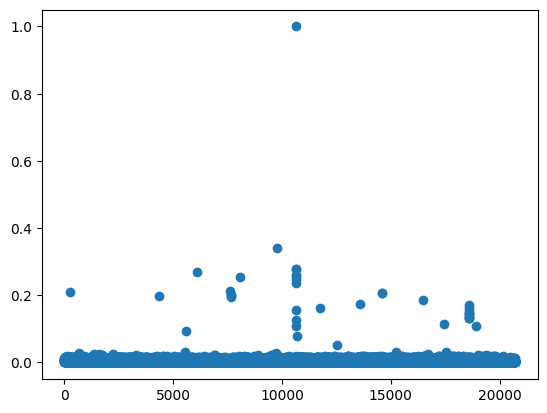

In [35]:
song_name = input("Enter the song name: ")
list_song = sy_data['Track'].tolist()
find_match = difflib.get_close_matches(song_name, list_song)
find_closematch = find_match[0]
index_music = sy_data[sy_data.Track == find_closematch]['index'].values[0]
similarity_score = list(enumerate(similarity[index_music]))
sorted_similarity = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print("Music suggested")
i=1
for music in sorted_similarity:
  index = music[0]
  title_music = sy_data[sy_data.index == index ]['Track'].values[0]
  if (i<16):
    print(i, '.',title_music)
    i=i+1

x = [d[0] for d in similarity_score]
y = [d[1] for d in similarity_score]

# Create scatter plot
plt.scatter(x, y)
plt.show()